In [9]:
from fastbook import *
from fastai.vision.widgets import *
from IPython.display import display, clear_output
from functools import partial

path = Path.home() / '.data' / 'images' / 'family'

# Data

In [10]:
fam = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=partial(get_image_files, folders=['brendan', 'ellie', 'kara']),
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label,
                item_tfms=Resize(128),
               )

## Data Loader

In [13]:
fam = fam.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.9),
    # item_tfms=Resize(224, method=ResizeMethod.Pad, pad_mode=PadMode.Border),
    batch_tfms=aug_transforms()
)
dls = fam.dataloaders(path)

In [17]:
dls.valid.show_batch?

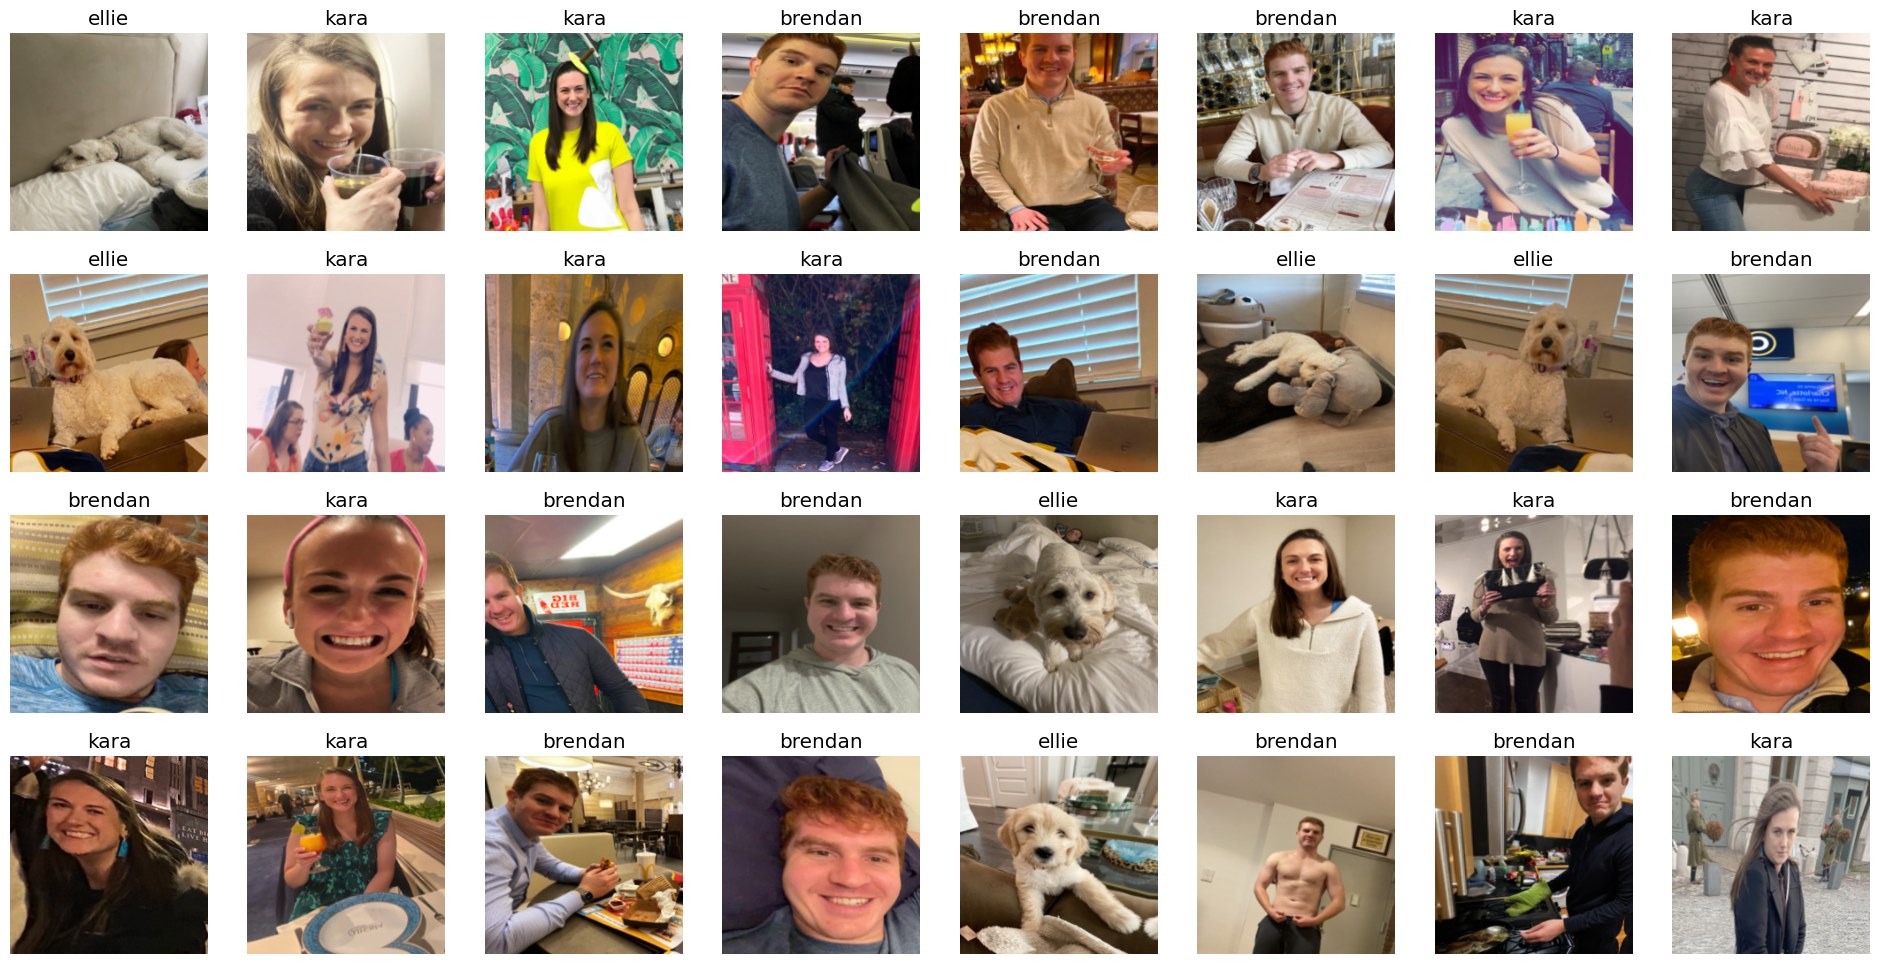

In [38]:
dls.train.show_batch(max_n=32, nrows=4)

# Training

In [ ]:
resnet

In [41]:
learn = vision_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(6)

/home/brendan/anaconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/brendan/anaconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /home/brendan/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.764323,1.581415,0.452830,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.390841,0.647441,0.169811,00:11
1,0.265261,0.506466,0.132075,00:11
2,0.207285,0.483730,0.113208,00:10
3,0.169567,0.440636,0.094340,00:10
4,0.131937,0.424189,0.075472,00:10
5,0.108945,0.401960,0.075472,00:10


# Evaluation

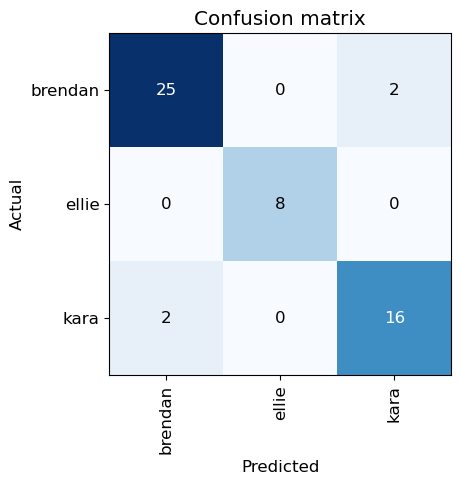

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

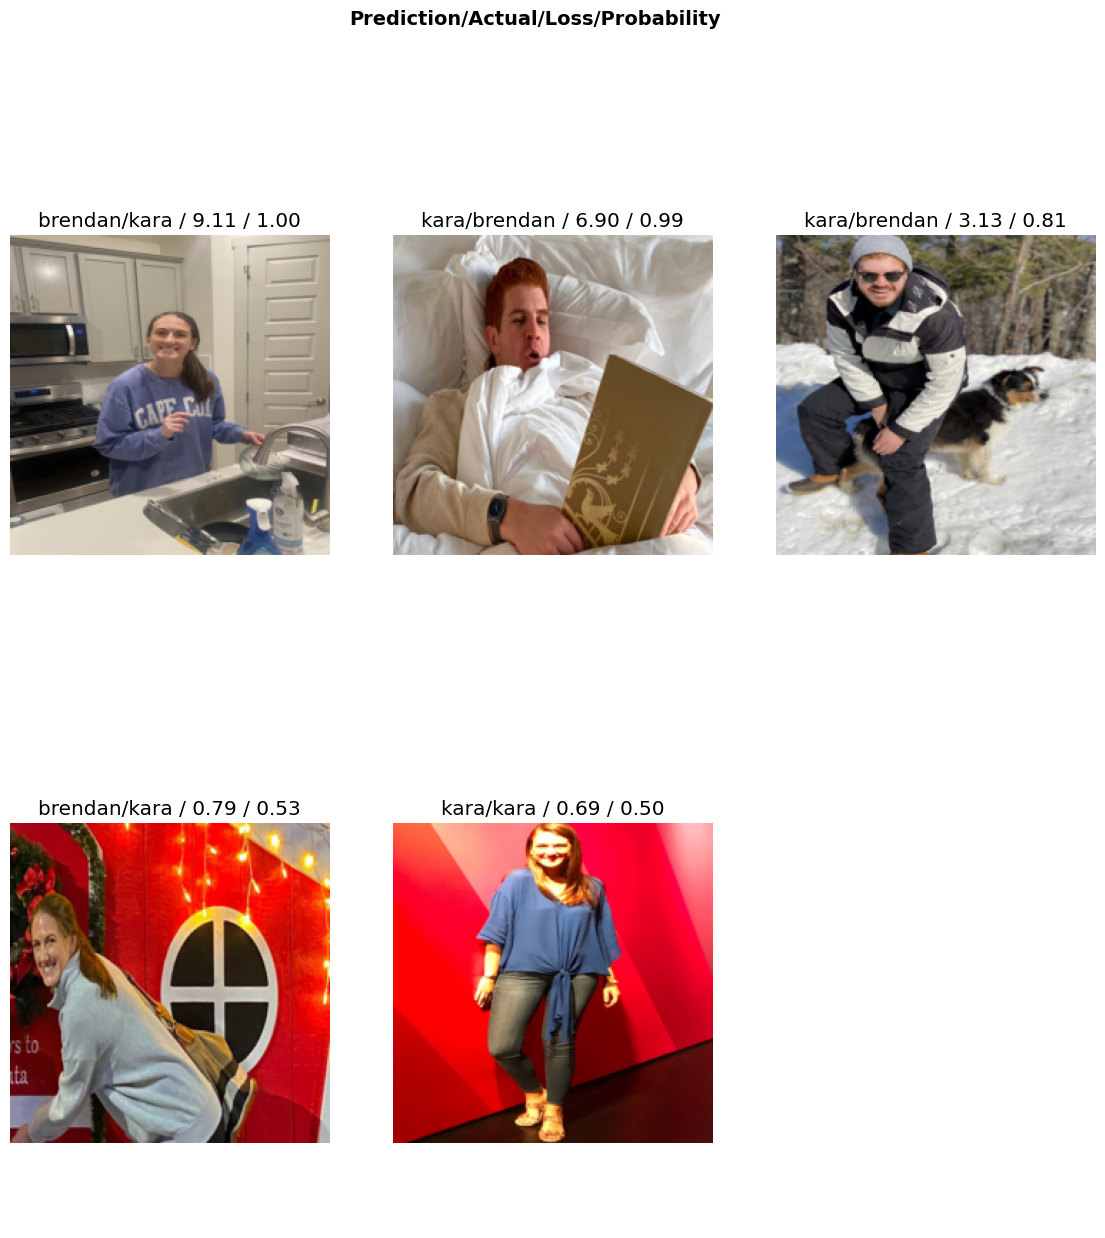

In [43]:
interp.plot_top_losses(5, nrows=2, figsize=(14, 14))

# Test Photos

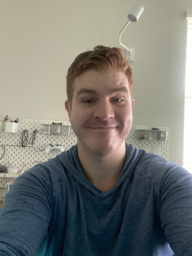

Predicted Brendan with a probability of 97%


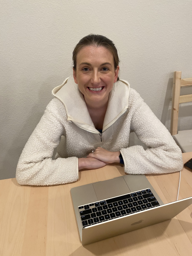

Predicted Kara with a probability of 97%


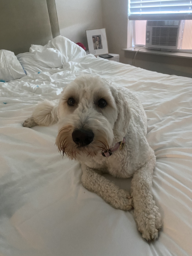

Predicted Ellie with a probability of 100%


In [44]:
photo_dir = Path('/home/brendan/.data/images/family/test')
cats = list(learn.dls.vocab)

for filename in photo_dir.glob('*'):
    img = Image.open(filename)
    display(img.to_thumb(256, 256))
    pred, _, pred_probas = learn.predict(filename)
    highest_prob = pred_probas[cats.index(pred)]
    print(f'Predicted {pred.title()} with a probability of {highest_prob:,.0%}')